![title](logo.jpg)

# Gaussian Discriminant Analysis

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
%matplotlib inline

Load the iris Dataset

In [123]:
iris = sklearn.datasets.load_iris()
X = iris.data
Y = iris.target

Train/Test Split

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

The GDA class

In [125]:
class GDA():
    
    def __init__(self):
        # 3 params sigma/MU_i/probability of each class
        self.sigma = None
        self.Mu = None
        self.prob_of_c = None
        
        
        
    def CalculateprobabilityOfY(self,Y,i):
        #return a list contains the probability of each class
        prob = (np.sum((Y == i)*1))/Y.shape[0]
        return prob
    
    
    
    def EstimateMu_i(self,X,Y,i):
        # return the MU value for class i
        a = ((Y == i)*1).reshape(-1,1)
        a = a * X
        a = np.sum(a,axis=0)
        b = np.sum((Y == i)*1)
        return a/b
    
    
    
    def EstimateSigma(self,X,Y):
        #return the shared covarience matrix for all classes
        N = X.shape[0]
        D = X.shape[1]
        sigma = 0
    
        for j in range(N):
            Mu_i = self.EstimateMu_i(X,Y,Y[j])
            Mu_i = Mu_i.reshape(1,-1)
            s = X[j].reshape(1,-1)
            sigma  += np.matmul((s-Mu_i).T,(s-Mu_i))
            
        return(sigma/N)
    
    
    
    
    def normal(self,X,Mu_i,sigma,Num_of_features):
        # return the normal distribution fit for each feature 
        # p(x/y=i)
        
        Mu_i = Mu_i.reshape(1,-1)

        det = np.linalg.det(sigma)
        constant = (2*np.pi)**(-Num_of_features/2.0) * (((det**-0.5)))

        w = np.matmul((X - Mu_i),(np.linalg.inv(sigma)))
        w = w * ((X - Mu_i))
        w = np.sum(w,axis=1)
        w = (-0.5)*w
        w = np.exp(w)
        w = w.reshape(-1,1)

        normal_i = constant * w
        normal_i = normal_i.reshape(-1,1)
        return normal_i
    
    
    
    
    def fit(self,X,Y):
        # Calculte probabilty of each class
        # Calculate MU for all classes
        # Calculate the shared sigma
        
        Classes = np.unique(Y)
        self.Mu = []
        self.prob_of_c = []
        
        for c in Classes:
            self.Mu.append(self.EstimateMu_i(X,Y,c))
            self.prob_of_c.append(self.CalculateprobabilityOfY(Y,c))
            
        self.sigma = self.EstimateSigma(X,Y)
        return
    
    
    
    
    def predict(self,X):
        # predict the class for the test set
        # p(c/x) = sum_for each class p(x/c=i)p(c=i)
        # our calss is the one with the highest p(c/x)
        
        Num_of_features = X.shape[1]
        Num_of_targets = len(self.Mu)

        predections = []

        for j in range(X.shape[0]):
            prob = []
            for i in range(Num_of_targets):
                Mu_i = self.Mu[i]
                Mu_i = Mu_i.reshape(1,-1)

                prob_x_given_y_equal_i = self.normal(X[j],Mu_i,self.sigma,Num_of_features)

                prob_of_y = self.prob_of_c[i]

                p = prob_x_given_y_equal_i * prob_of_y

                prob.append(p[0])

                if i == (Num_of_targets - 1):
                    predections.append(prob.index(max(prob)))
                    
        return predections
    
    
    
    def accuracy(self,predections,Y_true):
        #from the predictoins and the true values 
        # calculate the accuracy of the model
        
        accuracy = np.sum((Y_true == predections)*1)/(Y_true.shape[0])
        print ('accuracy: ' + str(round(accuracy, 2)))

In [126]:
gda = GDA()

In [127]:
gda.fit(X_train,Y_train)

In [128]:
predections = gda.predict(X_test)

In [129]:
gda.accuracy(predections,Y_test)

accuracy: 0.98


<function matplotlib.pyplot.show>

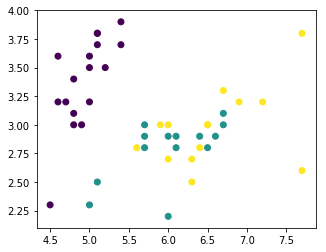

In [130]:
plt.figure(figsize=(5, 4))
plt.scatter(X_test[:,0], X_test[:,1], c=predections)
plt.show